<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Masculinity in the Time of #MeToo 

_Author:_ Tha Vin (Capstone Project March 2019)

---


### Hypothesis
Men in the workplace are adjusting their behavior in work, home and society due to the visibility of the #MeToo movement. I predict age and other demographics influence male perceptions, observations, behavior, and attitudes (POBA). The POBA methodology will identify segments of the male population and paint picture of the impact of #MeToo on the male behaviors:
- Identify segments in male population
- Describe the impact of #MeToo
- Develop attributes for males relative to #MeToo

### Data Guide

- [Link](#why_data_viz)
- [Link](#anscombe)

The raw data contains all 1,615 responses to the survey including the weights for each response. Responses to open-ended questions have been omitted, including those where a respondent explained what they meant by selecting the "other" option in response to a question.


### Part 1: Import Data


In [490]:
from IPython.display import HTML

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%matplotlib inline

plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 14
sns.set(style="whitegrid")
#increase default figure size for 

survey = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/masculinity-survey/raw-responses.csv')
survey.head(1615)

,Unnamed: 0,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,...,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
0,1,5/10/18 4:01,5/10/18 4:06,Somewhat masculine,Somewhat important,Not selected,Not selected,Not selected,Pop culture,Not selected,...,Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,College or more,35 - 64,No children,Gay/Bisexual,1.714026
1,2,5/10/18 6:30,5/10/18 6:53,Somewhat masculine,Somewhat important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,...,East North Central,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,1.247120
2,3,5/10/18 7:02,5/10/18 7:09,Very masculine,Not too important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,Has children,Straight,0.515746
3,4,5/10/18 7:27,5/10/18 7:31,Very masculine,Not too important,Father or father figure(s),Mother or mother figure(s),Other family members,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,Some college,Some college,65 and up,Has children,No answer,0.600640
4,5,5/10/18 7:35,5/10/18 7:42,Very masculine,Very important,Not selected,Not selected,Other family members,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,No children,Straight,1.033400
5,6,5/10/18 8:25,5/10/18 8:34,Very masculine,Somewhat important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,College or more,Post graduate degree,65 and up,Has children,Straight,0.059087
6,7,5/10/18 8:29,5/10/18 8:41,Somewhat masculine,Not too important,Father or father figure(s),Mother or mother figure(s),Other family members,Not selected,Friends,...,West North Central,Windows Desktop / Laptop,Non-white,Other,College or more,Post graduate degree,18 - 34,Has children,Gay/Bisexual,0.257360
7,8,5/10/18 10:04,5/10/18 10:11,Somewhat masculine,Somewhat important,Father or father figure(s),Not selected,Not selected,Pop culture,Friends,...,Middle Atlantic,Windows Desktop / Laptop,White,White,College or more,College or more,65 and up,No children,Straight,0.656490
8,9,5/10/18 11:00,5/10/18 11:07,Very masculine,Not at all important,Father or father figure(s),Not selected,Not selected,Not selected,Friends,...,Pacific,iOS Phone / Tablet,Non-white,Hispanic,Some college,Some college,35 - 64,Has children,Straight,4.341850
9,10,5/11/18 12:36,5/11/18 12:43,Somewhat masculine,Somewhat important,Father or father figure(s),Not selected,Not selected,Pop culture,Not selected,...,Pacific,iOS Phone / Tablet,White,White,College or more,Post graduate degree,35 - 64,No children,Straight,0.057482


In [491]:
survey.rename(columns={'Unnamed: 0':'RespondentID'}, inplace=True)

In [492]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 98 columns):
RespondentID    1615 non-null int64
StartDate       1615 non-null object
EndDate         1615 non-null object
q0001           1615 non-null object
q0002           1615 non-null object
q0004_0001      1615 non-null object
q0004_0002      1615 non-null object
q0004_0003      1615 non-null object
q0004_0004      1615 non-null object
q0004_0005      1615 non-null object
q0004_0006      1615 non-null object
q0005           1615 non-null object
q0007_0001      1615 non-null object
q0007_0002      1615 non-null object
q0007_0003      1615 non-null object
q0007_0004      1615 non-null object
q0007_0005      1615 non-null object
q0007_0006      1615 non-null object
q0007_0007      1615 non-null object
q0007_0008      1615 non-null object
q0007_0009      1615 non-null object
q0007_0010      1615 non-null object
q0007_0011      1615 non-null object
q0008_0001      1615 non-null object
q0008_

In [493]:
survey.index

RangeIndex(start=0, stop=1615, step=1)

In [494]:
print(survey.index.name)

None


In [495]:
survey.set_index('RespondentID', inplace=True)

In [496]:
print(survey.index.name)

RespondentID


In [497]:
survey.shape

(1615, 97)

In [498]:
survey.columns

Index(['StartDate', 'EndDate', 'q0001', 'q0002', 'q0004_0001', 'q0004_0002',
       'q0004_0003', 'q0004_0004', 'q0004_0005', 'q0004_0006', 'q0005',
       'q0007_0001', 'q0007_0002', 'q0007_0003', 'q0007_0004', 'q0007_0005',
       'q0007_0006', 'q0007_0007', 'q0007_0008', 'q0007_0009', 'q0007_0010',
       'q0007_0011', 'q0008_0001', 'q0008_0002', 'q0008_0003', 'q0008_0004',
       'q0008_0005', 'q0008_0006', 'q0008_0007', 'q0008_0008', 'q0008_0009',
       'q0008_0010', 'q0008_0011', 'q0008_0012', 'q0009', 'q0010_0001',
       'q0010_0002', 'q0010_0003', 'q0010_0004', 'q0010_0005', 'q0010_0006',
       'q0010_0007', 'q0010_0008', 'q0011_0001', 'q0011_0002', 'q0011_0003',
       'q0011_0004', 'q0011_0005', 'q0012_0001', 'q0012_0002', 'q0012_0003',
       'q0012_0004', 'q0012_0005', 'q0012_0006', 'q0012_0007', 'q0013',
       'q0014', 'q0015', 'q0017', 'q0018', 'q0019_0001', 'q0019_0002',
       'q0019_0003', 'q0019_0004', 'q0019_0005', 'q0019_0006', 'q0019_0007',
       'q0020_0001',

In [499]:
survey.head()

,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,...,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
RespondentID,,,,,,,,,,,,,,,,,,,,,
1,5/10/18 4:01,5/10/18 4:06,Somewhat masculine,Somewhat important,Not selected,Not selected,Not selected,Pop culture,Not selected,Not selected,...,Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,College or more,35 - 64,No children,Gay/Bisexual,1.714026
2,5/10/18 6:30,5/10/18 6:53,Somewhat masculine,Somewhat important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Not selected,...,East North Central,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,1.247120
3,5/10/18 7:02,5/10/18 7:09,Very masculine,Not too important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Other (please specify),...,East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,Has children,Straight,0.515746
4,5/10/18 7:27,5/10/18 7:31,Very masculine,Not too important,Father or father figure(s),Mother or mother figure(s),Other family members,Not selected,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,Some college,Some college,65 and up,Has children,No answer,0.600640
5,5/10/18 7:35,5/10/18 7:42,Very masculine,Very important,Not selected,Not selected,Other family members,Not selected,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,No children,Straight,1.033400


### Part 2: Explore Data

In [500]:
survey.rename(columns={'q0005': 'Q5:_Societal_pressure?'}, inplace=True)

In [501]:
survey.rename(columns={'q0007_0001': 'Q7: Ask friend for professional advice?'},inplace=True)
                       #'q0007_0002’:'Q7: Ask friend for personal advice?', 
                       #'q0007_0003’:'Q7: Express affection to guys?','q0007_0004’:'Q7: Cry?',
                       #'q0007_0005’: 'Q7: Fight?','q0007_0006’: 'Q7: Sexual relations with woman?','q0007_0007’: 'Q7: Sexual relations with man','q0007_0008’: 'Q7: Watch sports?','q0007_0009’: 'Q7: Workout?','q0007_0010’: 'Q7: See therapist?','q0007_0011’: 'Q7: Feel lonely?'}, inplace=True)


In [502]:
survey.rename(columns={'q0007_0002' : 'Ask friend for personal advice?'}, inplace =True)

In [503]:
survey.rename(columns={'q0007_0003': 'Express affection to guys?','q0007_0004': 'Q7: Cry?','q0007_0005': 'Q7: Fight?','q0007_0006': 'Q7: Sexual relations with woman?','q0007_0007': 'Q7: Sexual relations with man','q0007_0008': 'Q7: Watch sports?','q0007_0009': 'Q7: Workout?','q0007_0010': 'Q7: See therapist?','q0007_0011': 'Q7: Feel lonely?'},inplace=True)

In [504]:
survey.rename(columns={'q0008_0001' : 'Worry daily about height','q0008_0002' : 'Q8: Worry daily about weight','q0008_0003' : 'Q8: Worry daily about hair'}, inplace=True)


In [505]:
survey.rename(columns={'q0008_0004' : 'Worry daily about body','q0008_0005' : 'Q8: Worry daily about genitalia','q0008_0007' : 'Q8: Worry daily about quality or quantity of sex','q0008_0006' : 'Q8: Worry daily about clothing','q0008_0008' : 'Q8: Worry daily about mental health',},inplace=True)

In [506]:
survey.rename(columns={'q0008_0009' : 'Worry daily about physical health','q0008_0010' : 'Q8: Worry daily about finances','q0008_0011' : 'Q8: Worry daily about family','q0008_0012' : 'Q8: Worry daily about none above'},inplace=True)

In [507]:
survey.rename(columns={'q0009' : 'Employment status'}, inplace=True)

In [508]:
survey.rename(columns={'q0010_0001' : 'Q10: Money advantage','q0010_0001' : 'Q10: Money advantage','q0010_0002' : 'Q10: Taken seriously advantage','q0010_0003' : 'Q10: Choice advantage','q0010_0004' : 'Q10: Promotion advantage','q0010_0005' : 'Q10: Explicit praise advantage','q0010_0006' : 'Q10: Manager support advantage','q0010_0007' : 'Q10: Other advantage','q0010_0008' : 'Q10: None above advantage',}, inplace=True)

In [509]:
survey.rename(columns={'q0011_0001' : 'Q11: Confront accused','q0011_0002' : 'Q11: Contacted HR','q0011_0003' : 'Q11: Contacted mgr of accused','q0011_0004' : 'Q11: Supported victim','q0011_0005' : 'Q11: Did not respond','q0011_0006' : 'Q11: Never witnessed','q0011_0007' : 'Q11: Other'}, inplace=True)

In [510]:
survey.rename(columns={'q0012_0001' : 'Q12: Confront accused','q0012_0002' : 'Q12: Contacted HR','q0012_0003' : 'Q12: Contacted mgr of accused','q0012_0004' : 'Q12: Supported victim','q0012_0005' : 'Q12: Did not respond','q0012_0006' : 'Q12: Never witnessed','q0012_0007' : 'Q12: Other'}, inplace=True)

In [511]:
survey.rename(columns={'Q11: Confront accused': 'Q11: Hiring disadvantage','Q11: Contacted HR':'Q11: Accused of sex harassment disadvantage','Q11: Contacted mgr of accused':'Q11: Other','Q11: Supported victim':'Q11: None above'}, inplace=True)

In [512]:
survey.rename(columns={'q0013':'Q13: Main reason you did not respond to sexual harassment','q0014':'Heard of #MeToo','q0015':'Think about behavior in wake of #MeToo','q0017':'Expected to make first move','q0018':'Pays on date'},inplace=True)

In [513]:
survey.rename(columns={'q0019_0001' : 'Q19: Pay-Right thing','q0019_0002' : 'Q19: Pay-Make more money','q0019_0003' : 'Q19: Pay-Feels good','q0019_0004' : 'Q19: Pay-Societal expectations','q0019_0005' : 'Q19: Pay-You asked out','q0019_0006' : 'Q19: Pay-Test','q0019_0007' : 'Q19: Pay-Other'}, inplace=True)

In [514]:
survey.rename(columns={'q0020_0001' : 'Q20: Gauge interest by reading body language','q0020_0002' : 'Q20: Gauge interest by asking for verbal consent','q0020_0003' : 'Q20: Gauge interest by making physical move to see reaction','q0020_0005' : 'Q20: Not clear how to gauge interest','q0020_0004' : 'Q20: Every situtation is different','q0020_0006' : 'Q20: Other'}, inplace=True)

In [515]:
survey.rename(columns={'Heard of #MeToo':'Q14: Heard of #MeToo'},inplace=True)

In [516]:
survey.rename(columns={'Q15: Think about work behavior in wake of #MeToo':'Q15_Think_about_work_behavior_#MeToo'},inplace=True)

In [517]:
survey.rename(columns={'Expected to make first move':'Q17: Expected to make first move'},inplace=True)

In [518]:
survey.rename(columns={'Pays on date':'Q18: Pays on date'},inplace=True)

In [519]:
survey.rename(columns={'q0001':'Q1: Feel manly', 'q0002':'Q2: Others see you as manly'},inplace=True)

In [520]:
survey.rename(columns={'q0004_0001':'Q4: Ideas re: manhood from father', 'q0004_0002':'Q4: Ideas re: manhood from mother','q0004_0003':'Q4: Ideas re: manhood from family','q0004_0004':'Q4: Ideas re: manhood from pop culture','q0004_0005':'Q4: Ideas re: manhood from friends','q0004_0006':'Q4: Ideas re: manhood from other'},inplace=True)

In [521]:
survey.rename(columns={'q0007_0001':'Q7: How often ask...'},inplace=True)

In [522]:
survey.rename(columns={'q0021_0001':'21: Pushed too far sexually in last 12 months'},inplace=True)

In [523]:
survey.rename(columns={'q0021_0002':'21: Talked with a friend about about whether I pushed too far','q0021_0003':'21: Contacted past partner about whether I pushed too far','q0021_0004':'21: None above'},inplace=True)

In [524]:
survey.rename(columns={'21: Pushed too far sexually in last 12 months':'21: Wondered about pushing too far sexually'},inplace=True)

In [525]:
survey.rename(columns={'q0022':'22: Changed romantic behavior in #MeToo wake'},inplace=True)

In [526]:
survey.rename(columns={'q0024':'24: Marriage status'},inplace=True)

In [527]:
survey.rename(columns={'q0025_0001':'25: Kids under 18','q0025_0002':'25: Kids over 18','q0025_0003':'25: No kids'},inplace=True)

In [528]:
survey.rename(columns={'q0026':'26: Sexual orientation','q0028':'28: Race','q0029':'29: Last grade finished'},inplace=True)

In [529]:
survey.rename(columns={'q0030':'State'},inplace=True)

In [530]:
survey.rename(columns={'q0035':'Q35: Region', 'q0036':'Q36: Device'},inplace=True)

In [531]:
survey.rename(columns={'q0034':'Q34: Income'},inplace=True)

In [561]:
survey.columns

Index(['StartDate', 'EndDate', 'Q1: Feel manly', 'Q2: Others see you as manly',
       'Q4: Ideas re: manhood from father',
       'Q4: Ideas re: manhood from mother',
       'Q4: Ideas re: manhood from family',
       'Q4: Ideas re: manhood from pop culture',
       'Q4: Ideas re: manhood from friends',
       'Q4: Ideas re: manhood from other', 'Q5:_Societal_pressure?',
       'Q7: Ask friend for professional advice?',
       'Ask friend for personal advice?', 'Express affection to guys?',
       'Q7: Cry?', 'Q7: Fight?', 'Q7: Sexual relations with woman?',
       'Q7: Sexual relations with man', 'Q7: Watch sports?', 'Q7: Workout?',
       'Q7: See therapist?', 'Q7: Feel lonely?', 'Worry daily about height',
       'Q8: Worry daily about weight', 'Q8: Worry daily about hair',
       'Worry daily about body', 'Q8: Worry daily about genitalia',
       'Q8: Worry daily about clothing',
       'Q8: Worry daily about quality or quantity of sex',
       'Q8: Worry daily about mental health

In [566]:
pd.DataFrame(survey.dtypes, columns=['DataType'])

,DataType
Column,
StartDate,object
EndDate,object
Q1: Feel manly,int64
Q2: Others see you as manly,int64
Q4: Ideas re: manhood from father,object
Q4: Ideas re: manhood from mother,object
Q4: Ideas re: manhood from family,object
Q4: Ideas re: manhood from pop culture,object
Q4: Ideas re: manhood from friends,object


In [567]:
survey.columns

Index(['StartDate', 'EndDate', 'Q1: Feel manly', 'Q2: Others see you as manly',
       'Q4: Ideas re: manhood from father',
       'Q4: Ideas re: manhood from mother',
       'Q4: Ideas re: manhood from family',
       'Q4: Ideas re: manhood from pop culture',
       'Q4: Ideas re: manhood from friends',
       'Q4: Ideas re: manhood from other', 'Q5:_Societal_pressure?',
       'Q7: Ask friend for professional advice?',
       'Ask friend for personal advice?', 'Express affection to guys?',
       'Q7: Cry?', 'Q7: Fight?', 'Q7: Sexual relations with woman?',
       'Q7: Sexual relations with man', 'Q7: Watch sports?', 'Q7: Workout?',
       'Q7: See therapist?', 'Q7: Feel lonely?', 'Worry daily about height',
       'Q8: Worry daily about weight', 'Q8: Worry daily about hair',
       'Worry daily about body', 'Q8: Worry daily about genitalia',
       'Q8: Worry daily about clothing',
       'Q8: Worry daily about quality or quantity of sex',
       'Q8: Worry daily about mental health

In [568]:
survey.head()

Column,StartDate,EndDate,Q1: Feel manly,Q2: Others see you as manly,Q4: Ideas re: manhood from father,Q4: Ideas re: manhood from mother,Q4: Ideas re: manhood from family,Q4: Ideas re: manhood from pop culture,Q4: Ideas re: manhood from friends,Q4: Ideas re: manhood from other,...,Q35: Region,Q36: Device,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
RespondentID,,,,,,,,,,,,,,,,,,,,,
1,5/10/18 4:01,5/10/18 4:06,3,3,Not selected,Not selected,Not selected,Pop culture,Not selected,Not selected,...,Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,College or more,35 - 64,No children,Gay/Bisexual,1.714026
2,5/10/18 6:30,5/10/18 6:53,3,3,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Not selected,...,East North Central,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,1.247120
3,5/10/18 7:02,5/10/18 7:09,4,2,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Other (please specify),...,East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,Has children,Straight,0.515746
4,5/10/18 7:27,5/10/18 7:31,4,2,Father or father figure(s),Mother or mother figure(s),Other family members,Not selected,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,Some college,Some college,65 and up,Has children,0,0.600640
5,5/10/18 7:35,5/10/18 7:42,4,4,Not selected,Not selected,Other family members,Not selected,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,No children,Straight,1.033400


Trying to figure out what is "q0034"

### Part 2: Clean Data

In [569]:
#identify nulls

In [570]:
null_df = pd.DataFrame(survey.isnull().sum(), columns=['Count of Nulls'])
null_df.index.name='Column'
null_df.sort_values(['Count of Nulls'], ascending=False).head(2000)


,Count of Nulls
Column,
Q13: Main reason you did not respond to sexual harassment,1566
Think about behavior in wake of #MeToo,873
Q12: Confront accused,735
Q11: Accused of sex harassment disadvantage,735
Q10: Money advantage,735
Q10: Taken seriously advantage,735
Q10: Choice advantage,735
Q10: Promotion advantage,735
Q10: Explicit praise advantage,735


### Part 4: Understand Data

### Looking at the data

In [571]:
###how did men answer the #MeToo question?
survey['kids']

RespondentID
1        No children
2       Has children
3       Has children
4       Has children
5        No children
6       Has children
7       Has children
8        No children
9       Has children
10       No children
11      Has children
12       No children
13       No children
14      Has children
15       No children
16      Has children
17      Has children
18       No children
19      Has children
20       No children
21       No children
22      Has children
23      Has children
24      Has children
25       No children
26      Has children
27      Has children
28      Has children
29      Has children
30       No children
            ...     
1586     No children
1587    Has children
1588     No children
1589     No children
1590     No children
1591    Has children
1592     No children
1593     No children
1594     No children
1595     No children
1596    Has children
1597     No children
1598     No children
1599    Has children
1600    Has children
1601    Has children


In [572]:
survey['Think about behavior in wake of #MeToo']

RespondentID
1       NaN
2       NaN
3       0.0
4       NaN
5       1.0
6       0.0
7       NaN
8       NaN
9       0.0
10      0.0
11      0.0
12      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17      0.0
18      0.0
19      0.0
20      NaN
21      NaN
22      0.0
23      1.0
24      1.0
25      NaN
26      1.0
27      NaN
28      NaN
29      NaN
30      NaN
       ... 
1586    1.0
1587    0.0
1588    0.0
1589    NaN
1590    0.0
1591    NaN
1592    NaN
1593    1.0
1594    NaN
1595    0.0
1596    0.0
1597    NaN
1598    0.0
1599    0.0
1600    0.0
1601    0.0
1602    0.0
1603    0.0
1604    0.0
1605    NaN
1606    NaN
1607    NaN
1608    1.0
1609    1.0
1610    0.0
1611    1.0
1612    1.0
1613    1.0
1614    1.0
1615    NaN
Name: Think about behavior in wake of #MeToo, Length: 1615, dtype: float64

In [573]:
survey['Q1: Feel manly'].head()

RespondentID
1    3
2    3
3    4
4    4
5    4
Name: Q1: Feel manly, dtype: int64

In [574]:
survey['22: Changed romantic behavior in #MeToo wake']

RespondentID
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       1
9       0
10      0
11      0
12      0
13      0
14      1
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      1
28      0
29      0
30      0
       ..
1586    0
1587    0
1588    0
1589    0
1590    0
1591    0
1592    0
1593    0
1594    0
1595    0
1596    0
1597    0
1598    0
1599    0
1600    0
1601    0
1602    0
1603    0
1604    0
1605    0
1606    0
1607    0
1608    0
1609    0
1610    0
1611    0
1612    0
1613    0
1614    1
1615    0
Name: 22: Changed romantic behavior in #MeToo wake, Length: 1615, dtype: int64

In [575]:
survey['Q14: Heard of #MeToo']

RespondentID
1                  NaN
2                  NaN
3                A lot
4                  NaN
5                A lot
6        Only a little
7       Nothing at all
8                  NaN
9                 Some
10                Some
11                Some
12                 NaN
13                 NaN
14      Nothing at all
15                 NaN
16                 NaN
17                Some
18               A lot
19                Some
20                 NaN
21                 NaN
22               A lot
23                Some
24               A lot
25                 NaN
26               A lot
27                 NaN
28                 NaN
29                 NaN
30                 NaN
             ...      
1586             A lot
1587     Only a little
1588             A lot
1589               NaN
1590     Only a little
1591               NaN
1592               NaN
1593             A lot
1594               NaN
1595             A lot
1596              Some
1597               Na

In [576]:
print(survey.columns)

Index(['StartDate', 'EndDate', 'Q1: Feel manly', 'Q2: Others see you as manly',
       'Q4: Ideas re: manhood from father',
       'Q4: Ideas re: manhood from mother',
       'Q4: Ideas re: manhood from family',
       'Q4: Ideas re: manhood from pop culture',
       'Q4: Ideas re: manhood from friends',
       'Q4: Ideas re: manhood from other', 'Q5:_Societal_pressure?',
       'Q7: Ask friend for professional advice?',
       'Ask friend for personal advice?', 'Express affection to guys?',
       'Q7: Cry?', 'Q7: Fight?', 'Q7: Sexual relations with woman?',
       'Q7: Sexual relations with man', 'Q7: Watch sports?', 'Q7: Workout?',
       'Q7: See therapist?', 'Q7: Feel lonely?', 'Worry daily about height',
       'Q8: Worry daily about weight', 'Q8: Worry daily about hair',
       'Worry daily about body', 'Q8: Worry daily about genitalia',
       'Q8: Worry daily about clothing',
       'Q8: Worry daily about quality or quantity of sex',
       'Q8: Worry daily about mental health

In [577]:
survey[['Think about behavior in wake of #MeToo', '22: Changed romantic behavior in #MeToo wake']].describe() #these are the #MeToo questions

Column,Think about behavior in wake of #MeToo,22: Changed romantic behavior in #MeToo wake
count,742.000000,1615.000000
mean,0.332884,0.089164
std,0.471563,0.285069
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,1.000000,1.000000


In [578]:
survey['Think about behavior in wake of #MeToo'].value_counts() #these are the #MeToo questions

0.0    495
1.0    247
Name: Think about behavior in wake of #MeToo, dtype: int64

In [579]:
 survey['22: Changed romantic behavior in #MeToo wake'].value_counts()#these are the #MeToo questions

0    1471
1     144
Name: 22: Changed romantic behavior in #MeToo wake, dtype: int64

## #MeToo - Impact on Men's Romatic Lives

In [580]:
#groupby changed romantic behavior
survey.groupby(['22: Changed romantic behavior in #MeToo wake']).count()

Column,StartDate,EndDate,Q1: Feel manly,Q2: Others see you as manly,Q4: Ideas re: manhood from father,Q4: Ideas re: manhood from mother,Q4: Ideas re: manhood from family,Q4: Ideas re: manhood from pop culture,Q4: Ideas re: manhood from friends,Q4: Ideas re: manhood from other,...,Q35: Region,Q36: Device,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
22: Changed romantic behavior in #MeToo wake,,,,,,,,,,,,,,,,,,,,,
0,1471,1471,1471,1471,1471,1471,1471,1471,1471,1471,...,1455,1470,1471,1471,1471,1471,1471,1462,1471,1471
1,144,144,144,144,144,144,144,144,144,144,...,140,143,144,144,144,144,144,144,144,144


In [581]:
#unique values
survey['22: Changed romantic behavior in #MeToo wake'].unique()

array([0, 1])

In [582]:
#describe
#survey['22: Changed romantic behavior in #MeToo wake','Q35: Region','age3','kids','orientation','race2','racethn4']
survey[['22: Changed romantic behavior in #MeToo wake','age3']].groupby('22: Changed romantic behavior in #MeToo wake').max().sort_values('age3',ascending=False)

Column,age3
22: Changed romantic behavior in #MeToo wake,
0,65 and up
1,65 and up


In [583]:
#groupby Think about work behavior
survey.groupby(['Think about behavior in wake of #MeToo']).count()

Column,StartDate,EndDate,Q1: Feel manly,Q2: Others see you as manly,Q4: Ideas re: manhood from father,Q4: Ideas re: manhood from mother,Q4: Ideas re: manhood from family,Q4: Ideas re: manhood from pop culture,Q4: Ideas re: manhood from friends,Q4: Ideas re: manhood from other,...,Q35: Region,Q36: Device,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
Think about behavior in wake of #MeToo,,,,,,,,,,,,,,,,,,,,,
0.0,495,495,495,495,495,495,495,495,495,495,...,491,495,495,495,495,495,495,493,495,495
1.0,247,247,247,247,247,247,247,247,247,247,...,245,247,247,247,247,247,247,246,247,247


In [584]:
survey['Think about behavior in wake of #MeToo'].unique()

array([nan,  0.,  1.])

In [585]:
def letter_to_digit(letter):
    letter_dict = {
        'No':0,
        'Yes':1,
        'No Answer':0
    }
    try:
        return letter_dict[letter]
    except KeyError:
        return 'N'

In [586]:
survey['Think about behavior in wake of #MeToo'].apply(letter_to_digit)

RespondentID
1       N
2       N
3       N
4       N
5       N
6       N
7       N
8       N
9       N
10      N
11      N
12      N
13      N
14      N
15      N
16      N
17      N
18      N
19      N
20      N
21      N
22      N
23      N
24      N
25      N
26      N
27      N
28      N
29      N
30      N
       ..
1586    N
1587    N
1588    N
1589    N
1590    N
1591    N
1592    N
1593    N
1594    N
1595    N
1596    N
1597    N
1598    N
1599    N
1600    N
1601    N
1602    N
1603    N
1604    N
1605    N
1606    N
1607    N
1608    N
1609    N
1610    N
1611    N
1612    N
1613    N
1614    N
1615    N
Name: Think about behavior in wake of #MeToo, Length: 1615, dtype: object

In [587]:
survey['Think about behavior in wake of #MeToo'].unique()

array([nan,  0.,  1.])

In [588]:
#recoding survey responses to integers
survey = survey.replace({'No':0, 'No answer':0, 'Yes':1, 'Very masculine':4,'Somewhat masculine':3,'Not very masculine':2,'Not at all masculine':1,'Very important':4,'Somewhat important':3,'Not too important':2,'Not at all important':1,'Often':5,'Sometimes':4,'Rarely':3,'Never, but open to it':2,'Never, but not open to it':1,'Employed, working full-time':6,'Employed, working part-time':5,'Not employed, student':4,'Not employed-retired':3,'Not employed, looking for work':2,'Not employed, NOT looking for work':1})

In [589]:
survey['Think about behavior in wake of #MeToo'].unique()

array([nan,  0.,  1.])

In [590]:
survey['Q1: Feel manly'].unique()

array([3, 4, 1, 2, 0])

In [626]:
survey['Employment status'].unique()

array([1, 3, 6, 4, 5, 2, 0])

In [592]:
survey.shape

(1615, 97)

### Basic Analysis

In [593]:
survey.groupby('kids').agg(['count','mean']) 

Q1: Feel manly           Q2: Others see you as manly            \
                      count      mean                       count      mean   
kids                                                                          
Has children           1065  3.292019                        1065  2.522066   
No children             541  3.121996                         541  2.386322   

             Q5:_Societal_pressure?           Employment status            \
                              count      mean             count      mean   
kids                                                                        
Has children                   1065  0.559624              1065  4.432864   
No children                     541  0.656192               541  4.290203   

             Think about behavior in wake of #MeToo            \
                                              count      mean   
kids                                                            
Has children                                    488  0.325820   
No children                                     251  0.346614   

             Q17: Expected to make first move            \
                                        count      mean   
kids                                                      
Has children                             1065  0.628169   
No children                               541  0.634011   

             22: Changed romantic behavior in #MeToo wake           weight  \
                                                    count      mean  count   
kids                                                                         
Has children                                         1065  0.072300   1065   
No children                                           541  0.123845    541   

                        
                  mean  
kids                    
Has children  0.805406  
No children   1.382417

## Describing men who were influenced by MeToo

In [594]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplolib inline
sns.set(font_scale=10);

UsageError: Line magic function `%matplolib` not found.


In [595]:
#sns.lmplot(x='Think about behavior in wake of #MeToo', y='Q1 Feel manly', data=survey)
#survey.plot(kind='scatter', x='Think about behavior in wake of #MeToo' , y='Q1 Feel manly');
#variable: '22: Changed romantic behavior in #MeToo wake'
#variable: 'Q7: Sexual relations with woman?'
#variable: 'Q7: Sexual relations with man?'
#variable: 'age3'
#variable: ''Think about behavior in wake of #MeToo'
#variable: 'orientation'
#variable: 'Q17: Expected to make first move'

#ax = sns.stripplot(x = "Q7: Sexual relations with woman?", data=survey)
survey.shape

(1615, 97)

In [596]:
survey.columns

Index(['StartDate', 'EndDate', 'Q1: Feel manly', 'Q2: Others see you as manly',
       'Q4: Ideas re: manhood from father',
       'Q4: Ideas re: manhood from mother',
       'Q4: Ideas re: manhood from family',
       'Q4: Ideas re: manhood from pop culture',
       'Q4: Ideas re: manhood from friends',
       'Q4: Ideas re: manhood from other', 'Q5:_Societal_pressure?',
       'Q7: Ask friend for professional advice?',
       'Ask friend for personal advice?', 'Express affection to guys?',
       'Q7: Cry?', 'Q7: Fight?', 'Q7: Sexual relations with woman?',
       'Q7: Sexual relations with man', 'Q7: Watch sports?', 'Q7: Workout?',
       'Q7: See therapist?', 'Q7: Feel lonely?', 'Worry daily about height',
       'Q8: Worry daily about weight', 'Q8: Worry daily about hair',
       'Worry daily about body', 'Q8: Worry daily about genitalia',
       'Q8: Worry daily about clothing',
       'Q8: Worry daily about quality or quantity of sex',
       'Q8: Worry daily about mental health

In [597]:
survey.describe

<bound method NDFrame.describe of Column            StartDate        EndDate  Q1: Feel manly  \
RespondentID                                                 
1              5/10/18 4:01   5/10/18 4:06               3   
2              5/10/18 6:30   5/10/18 6:53               3   
3              5/10/18 7:02   5/10/18 7:09               4   
4              5/10/18 7:27   5/10/18 7:31               4   
5              5/10/18 7:35   5/10/18 7:42               4   
6              5/10/18 8:25   5/10/18 8:34               4   
7              5/10/18 8:29   5/10/18 8:41               3   
8             5/10/18 10:04  5/10/18 10:11               3   
9             5/10/18 11:00  5/10/18 11:07               4   
10            5/11/18 12:36  5/11/18 12:43               3   
11             5/11/18 3:07   5/11/18 3:16               4   
12             5/11/18 5:18   5/11/18 5:33               3   
13             5/11/18 5:50   5/11/18 5:53               4   
14             5/11/18 5:51   5/11/1

In [598]:
survey['Q17: Expected to make first move'].unique()

array([1, 0])

In [599]:
survey['Think about behavior in wake of #MeToo'].unique()

array([nan,  0.,  1.])

In [600]:
survey['22: Changed romantic behavior in #MeToo wake'].value_counts(dropna=True)

0    1471
1     144
Name: 22: Changed romantic behavior in #MeToo wake, dtype: int64

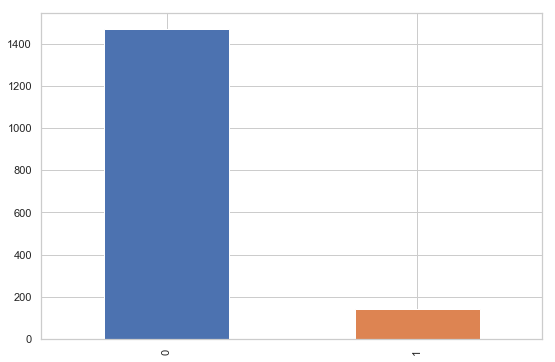

In [601]:
survey['22: Changed romantic behavior in #MeToo wake'].value_counts().plot(kind='bar');

In [602]:
survey['Q17: Expected to make first move'].value_counts(dropna=False)

1    1014
0     601
Name: Q17: Expected to make first move, dtype: int64

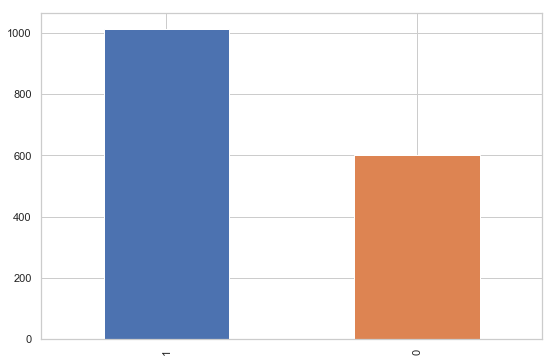

In [603]:
survey['Q17: Expected to make first move'].value_counts().plot(kind='bar');

In [604]:
survey['Q14: Heard of #MeToo'].value_counts(dropna=False)

NaN               735
A lot             432
Some              225
Nothing at all    137
Only a little      85
0                   1
Name: Q14: Heard of #MeToo, dtype: int64

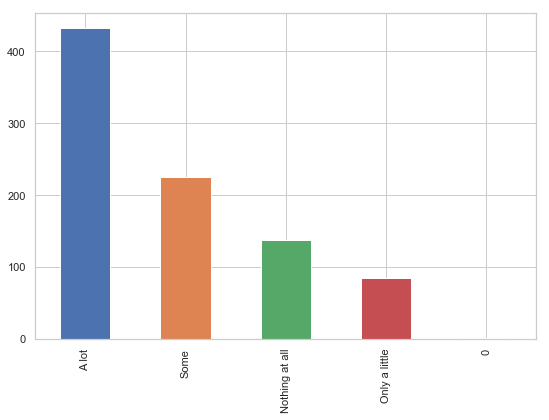

In [605]:
survey['Q14: Heard of #MeToo'].value_counts().plot(kind='bar');

In [606]:
survey['Think about behavior in wake of #MeToo'].value_counts(dropna=False)

NaN     873
 0.0    495
 1.0    247
Name: Think about behavior in wake of #MeToo, dtype: int64

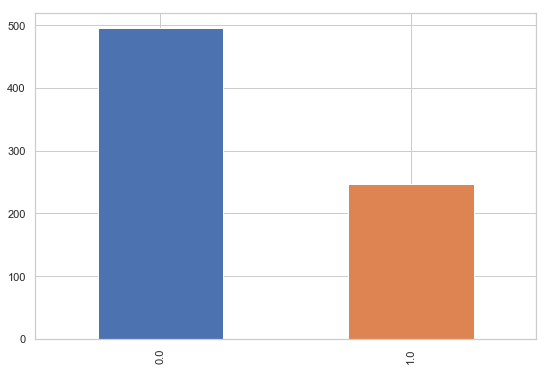

In [607]:
survey['Think about behavior in wake of #MeToo'].value_counts().plot(kind='bar');

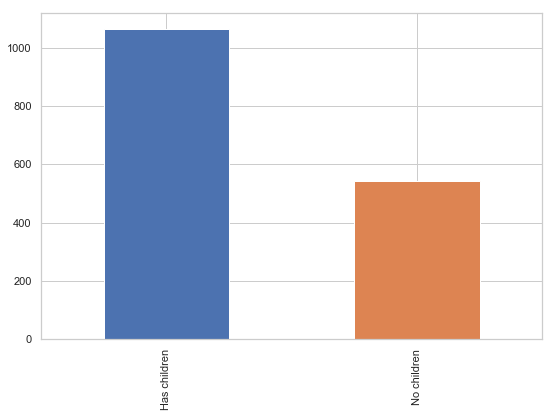

In [608]:
survey.kids.value_counts().plot(kind='bar');

In [609]:
survey['26: Sexual orientation'].value_counts(dropna=False)

Straight    1408
Gay          111
Bisexual      52
Other         31
0             13
Name: 26: Sexual orientation, dtype: int64

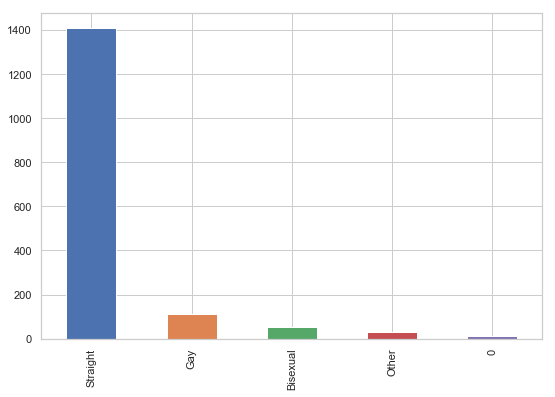

In [610]:
survey['26: Sexual orientation'].value_counts().plot(kind='bar');

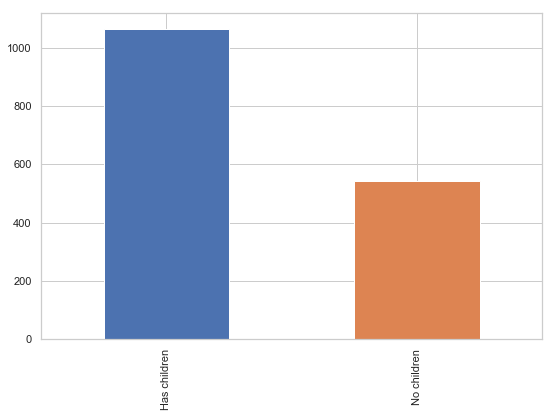

In [611]:
survey.kids.value_counts().plot(kind='bar');

In [612]:
 survey['educ3'].value_counts(dropna=False)

College or more        997
Some college           440
High school or less    178
Name: educ3, dtype: int64

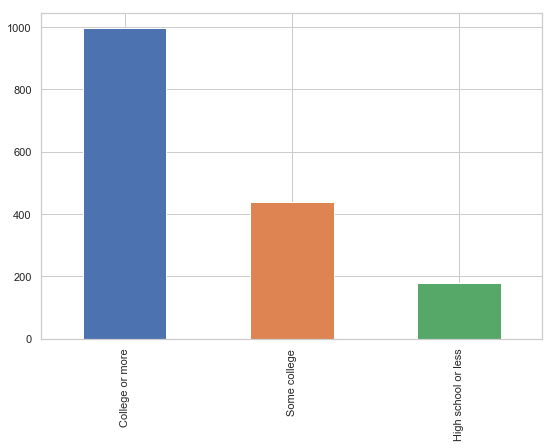

In [613]:
survey['educ3'].value_counts().plot(kind='bar');

In [614]:
 survey['race2'].value_counts(dropna=False)

White        1351
Non-white     264
Name: race2, dtype: int64

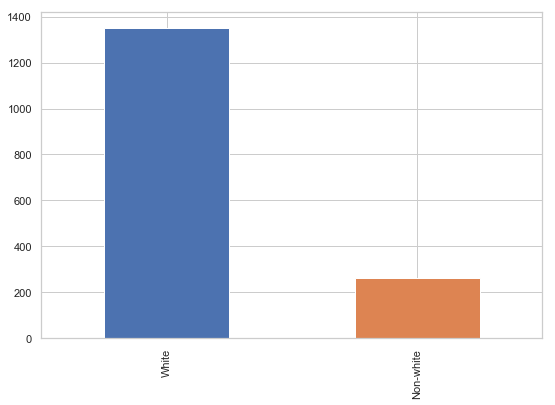

In [615]:
survey['race2'].value_counts().plot(kind='bar');

In [616]:
 survey['racethn4'].value_counts(dropna=False)

White       1351
Other        121
Black         72
Hispanic      71
Name: racethn4, dtype: int64

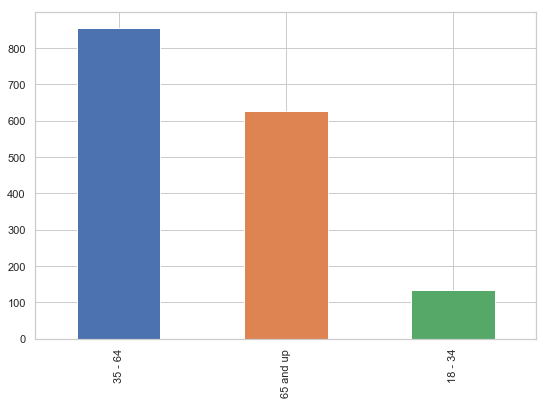

In [617]:
survey['age3'].value_counts().plot(kind='bar');

In [618]:
 survey['age3'].value_counts(dropna=False)

35 - 64      855
65 and up    627
18 - 34      133
Name: age3, dtype: int64

In [619]:
survey['Q35: Region'].value_counts(dropna=False)

South Atlantic        302
Pacific               280
East North Central    233
Middle Atlantic       223
West South Central    154
Mountain              150
West North Central    115
New England            79
East South Central     59
NaN                    20
Name: Q35: Region, dtype: int64

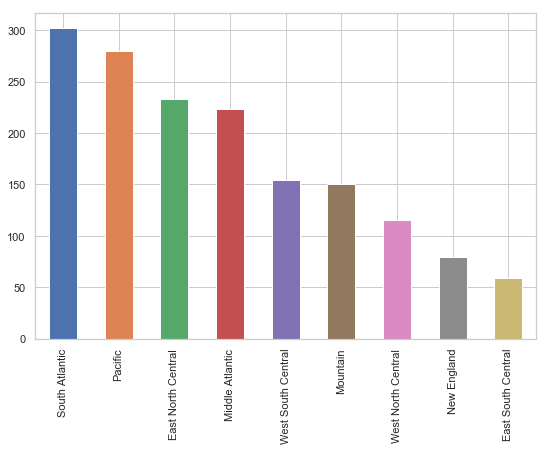

In [620]:
survey['Q35: Region'].value_counts().plot(kind='bar');

In [621]:
survey.kids.value_counts()

Has children    1065
No children      541
Name: kids, dtype: int64

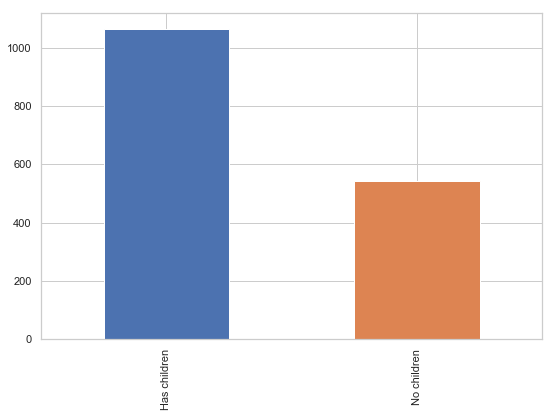

In [622]:
survey.kids.value_counts().plot(kind='bar');

## KMeans

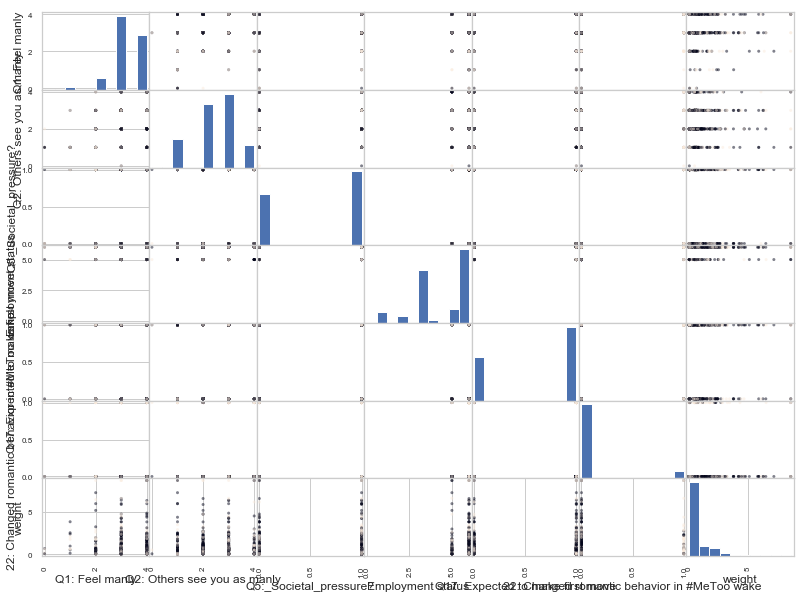

In [624]:
pd.plotting.scatter_matrix(survey.drop('Think about behavior in wake of #MeToo', axis = 1), c = survey['Think about behavior in wake of #MeToo'], figsize=(12,10));


In [627]:
print(survey.head())

Column           StartDate       EndDate  Q1: Feel manly  \
RespondentID                                               
1             5/10/18 4:01  5/10/18 4:06               3   
2             5/10/18 6:30  5/10/18 6:53               3   
3             5/10/18 7:02  5/10/18 7:09               4   
4             5/10/18 7:27  5/10/18 7:31               4   
5             5/10/18 7:35  5/10/18 7:42               4   

Column        Q2: Others see you as manly Q4: Ideas re: manhood from father  \
RespondentID                                                                  
1                                       3                      Not selected   
2                                       3        Father or father figure(s)   
3                                       2        Father or father figure(s)   
4                                       2        Father or father figure(s)   
5                                       4                      Not selected   

Column       Q4: Ideas re

In [646]:
survey.convert_objects(convert_numeric=True)
survey.fillna(0, inplace=True)
print(survey.head())

   Unnamed: 0     StartDate       EndDate               q0001  \
0           1  5/10/18 4:01  5/10/18 4:06  Somewhat masculine   
1           2  5/10/18 6:30  5/10/18 6:53  Somewhat masculine   
2           3  5/10/18 7:02  5/10/18 7:09      Very masculine   
3           4  5/10/18 7:27  5/10/18 7:31      Very masculine   
4           5  5/10/18 7:35  5/10/18 7:42      Very masculine   

                q0002                  q0004_0001                  q0004_0002  \
0  Somewhat important                Not selected                Not selected   
1  Somewhat important  Father or father figure(s)                Not selected   
2   Not too important  Father or father figure(s)                Not selected   
3   Not too important  Father or father figure(s)  Mother or mother figure(s)   
4      Very important                Not selected                Not selected   

             q0004_0003    q0004_0004    q0004_0005    ...     \
0          Not selected   Pop culture  Not selected    ..

/Users/thavin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [648]:
survey = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/masculinity-survey/raw-responses.csv')


In [650]:
survey.convert_objects(convert_numeric=True)
survey.fillna(0, inplace=True)
print(survey.head())

   Unnamed: 0     StartDate       EndDate               q0001  \
0           1  5/10/18 4:01  5/10/18 4:06  Somewhat masculine   
1           2  5/10/18 6:30  5/10/18 6:53  Somewhat masculine   
2           3  5/10/18 7:02  5/10/18 7:09      Very masculine   
3           4  5/10/18 7:27  5/10/18 7:31      Very masculine   
4           5  5/10/18 7:35  5/10/18 7:42      Very masculine   

                q0002                  q0004_0001                  q0004_0002  \
0  Somewhat important                Not selected                Not selected   
1  Somewhat important  Father or father figure(s)                Not selected   
2   Not too important  Father or father figure(s)                Not selected   
3   Not too important  Father or father figure(s)  Mother or mother figure(s)   
4      Very important                Not selected                Not selected   

             q0004_0003    q0004_0004    q0004_0005    ...     \
0          Not selected   Pop culture  Not selected    ..

/Users/thavin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [653]:
def handle_non_numerical_data(survey):
    columns = survey.columns.values
    
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]
            
        if survey[column].dtype != np.int64 and survey[column].dtype !=np.float64:
            column_contents = survey[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1
                        
            survey[column] = list(map(convert_to_int, survey[column]))
                    
        return survey
survey = handle_non_numerical_data(survey)
print(survey.head())
    

   Unnamed: 0     StartDate       EndDate               q0001  \
0           1  5/10/18 4:01  5/10/18 4:06  Somewhat masculine   
1           2  5/10/18 6:30  5/10/18 6:53  Somewhat masculine   
2           3  5/10/18 7:02  5/10/18 7:09      Very masculine   
3           4  5/10/18 7:27  5/10/18 7:31      Very masculine   
4           5  5/10/18 7:35  5/10/18 7:42      Very masculine   

                q0002                  q0004_0001                  q0004_0002  \
0  Somewhat important                Not selected                Not selected   
1  Somewhat important  Father or father figure(s)                Not selected   
2   Not too important  Father or father figure(s)                Not selected   
3   Not too important  Father or father figure(s)  Mother or mother figure(s)   
4      Very important                Not selected                Not selected   

             q0004_0003    q0004_0004    q0004_0005    ...     \
0          Not selected   Pop culture  Not selected    ..